In [1]:
#pip uninstall kafka

In [16]:
import findspark
findspark.init()

In [17]:
#pip install kafka-python

In [22]:
from kafka import KafkaConsumer
import matplotlib.pyplot as plt
import json
import threading

In [23]:
consumer = KafkaConsumer('askPriceOutput',
                         group_id='askPriceOutput',
                         bootstrap_servers=['localhost:9092'],
                        )
print("consumer started ...")

consumer started ...


In [24]:
x = {}

In [25]:
def plot():
    global x
    for message in consumer:
        x[json.loads((message.value).decode("utf-8"))["quoteTimestamp"]] = json.loads((message.value).decode("utf-8"))["askPrice"]

In [26]:
plot_thread = threading.Thread(target=plot)

In [27]:
plot_thread.start()

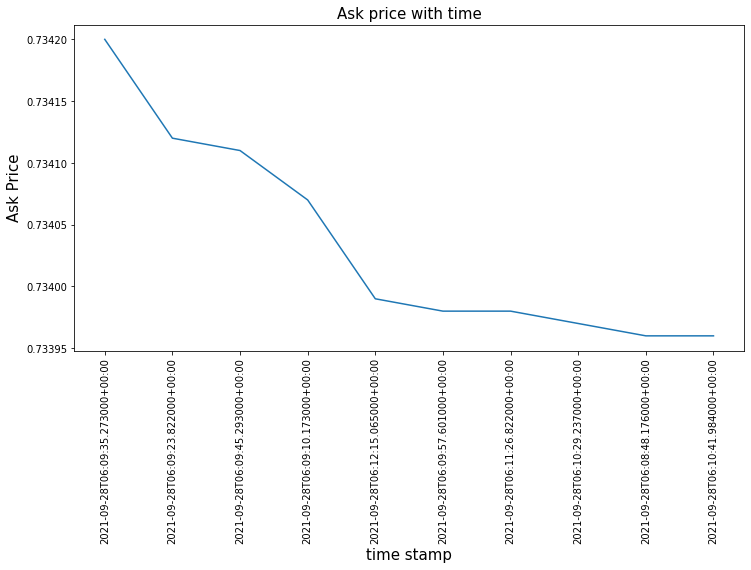

In [38]:
try:
    fig = plt.figure(figsize = (12, 6))
    x = dict(sorted(x.items(), key=lambda item: item[1], reverse=True))

    plt.plot([*x.keys()][:10], [*x.values()][:10])

    plt.xlabel("time stamp", fontsize=15)
    plt.ylabel("Ask Price", fontsize=15)
    plt.title("Ask price with time", fontsize=15)
    plt.xticks(rotation = 90)
    plt.show()
except:
    print(f"atleast 10 data needed but {len(x)} data is there")